In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
from pmdarima.arima import auto_arima

C:\Users\abhay.jamwal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\abhay.jamwal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [74]:
data = pd.read_csv(r'C:\Users\abhay.jamwal\Downloads\original\UDEMY_TSA_FINAL\Data\co2_mm_mlo.csv')

In [75]:
data.shape

(729, 5)

In [76]:
data['date'] = pd.to_datetime({'year': data['year'], 'month': data['month'],'day':1})

In [77]:
data.head()

,year,month,decimal_date,average,interpolated,date
0,1958,3,1958.208,315.71,315.71,1958-03-01
1,1958,4,1958.292,317.45,317.45,1958-04-01
2,1958,5,1958.375,317.50,317.50,1958-05-01
3,1958,6,1958.458,NaN,317.10,1958-06-01
4,1958,7,1958.542,315.86,315.86,1958-07-01


In [78]:
data = data.set_index('date')

In [79]:
data.index.freq = 'MS'

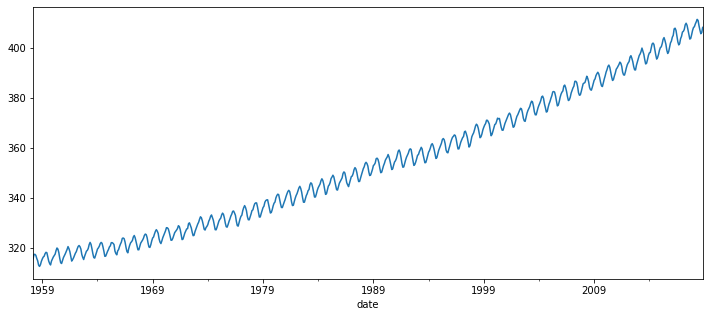

In [80]:
data['interpolated'].plot(figsize = (12,5))

In [38]:
# # results = seasonal_decompose(data['interpolated'],model= 'mul',period = 12)
# results.plot();

In [37]:
# results.seasonal.plot(figsize = (12,8))

In [81]:
auto_arima(data['interpolated'],seasonal=True,m = 12).summary()

C:\Users\abhay.jamwal\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\abhay.jamwal\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\abhay.jamwal\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\abhay.jamwal\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\abhay.jamwal\AppData\Local\Continuum\an

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  729
Model:             SARIMAX(0, 1, 1)x(2, 0, [1, 2], 12)   Log Likelihood                -208.369
Date:                                 Wed, 11 Mar 2020   AIC                            430.737
Time:                                         00:51:13   BIC                            462.869
Sample:                                              0   HQIC                           443.136
                                                 - 729                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7.468e-05      0.000      0.334      0.738      -0.000       0.001
ma.L1         -0.3735      0.034    -10.884      0.000      -0.441      -0.306
ar.S.L12       0.0325      0.009      3.508      0.000       0.014       0.051
ar.S.L24       0.9669      0.009    103.461      0.000       0.949       0.985
ma.S.L12       0.1275      0.031      4.124      0.000       0.067       0.188
ma.S.L24      -0.8664      0.043    -19.919      0.000      -0.952      -0.781
sigma2         0.0951      0.006     16.384      0.000       0.084       0.106
===================================================================================
Ljung-Box (Q):                       50.43   Jarque-Bera (JB):                 4.28
Prob(Q):                              0.12   Prob(JB):                         0.12
Heteroskedasticity (H):               1.12   Skew:                            -0.04
Prob(H) (two-sided):                  0.37   Kurtosis:                         3.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [82]:
train = data.iloc[:717]
test = data.iloc[717:]

In [85]:
model = SARIMAX(train['interpolated'],order=(0, 1, 1),seasonal_order=(2, 0, [1, 2], 12))

In [86]:
result = model.fit()

In [87]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                            interpolated   No. Observations:                  717
Model:             SARIMAX(0, 1, 1)x(2, 0, [1, 2], 12)   Log Likelihood                -205.142
Date:                                 Wed, 11 Mar 2020   AIC                            422.285
Time:                                         00:54:11   BIC                            449.727
Sample:                                     03-01-1958   HQIC                           432.882
                                          - 11-01-2017                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3707      0.034    -10.770      0.000      -0.438      -0.303
ar.S.L12       0.8743      0.241      3.635      0.000       0.403       1.346
ar.S.L24       0.1254      0.241      0.521      0.602      -0.346       0.597
ma.S.L12      -0.7358      0.247     -2.976      0.003      -1.220      -0.251
ma.S.L24      -0.1127      0.220     -0.512      0.609      -0.544       0.319
sigma2         0.0960      0.005     20.141      0.000       0.087       0.105
===================================================================================
Ljung-Box (Q):                       51.89   Jarque-Bera (JB):                 3.76
Prob(Q):                              0.10   Prob(JB):                         0.15
Heteroskedasticity (H):               1.13   Skew:                            -0.02
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [88]:
start = len(train)
end = len(train) + len(test) - 1

In [52]:
start,end

(717, 728)

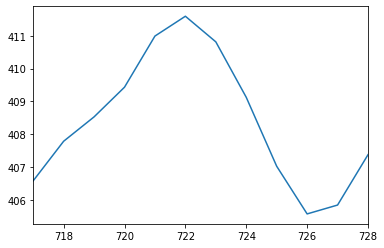

In [63]:
# test['interpolated'].plot()
prediction.plot()

In [89]:
predictions = result.predict(start,end,typ = 'levels',dynamic=False)

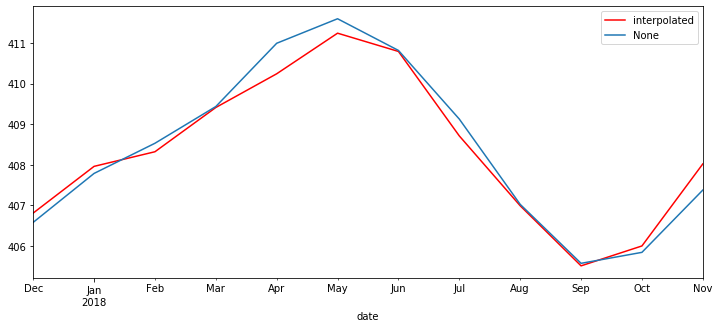

In [90]:
test['interpolated'].plot(figsize = (12,5),color = 'red',legend = True)
predictions.plot(legend = True)

## Future prediction

In [91]:
model_future = SARIMAX(data['interpolated'],order=(0, 1, 1),seasonal_order=(2, 0, [1, 2], 12))

In [92]:
results_future = model_future.fit()

C:\Users\abhay.jamwal\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


In [93]:
forcast = results_future.predict(len(data),len(data)+12,typ = 'levels')

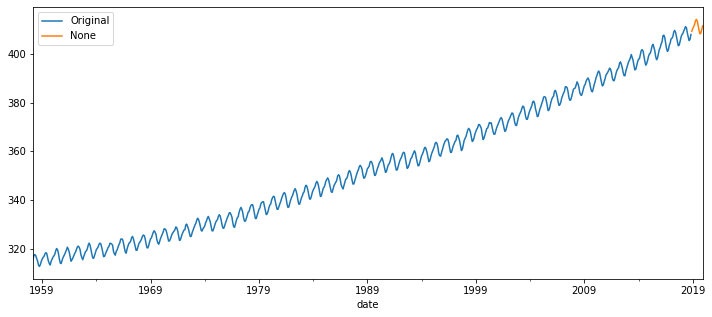

In [94]:
data['interpolated'].plot(legend = True,label = 'Original',figsize = (12,5))
forcast.plot(legend = True)

In [ ]:
data